<a href="https://colab.research.google.com/github/Ash-760/AI-FOR-SOFTWARE-ENGINEERING-FINAL-PROJECT/blob/main/heart_disease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset file already present: processed.cleveland.data
Data shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Target value counts (0 = no disease, 1-4 = disease):
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


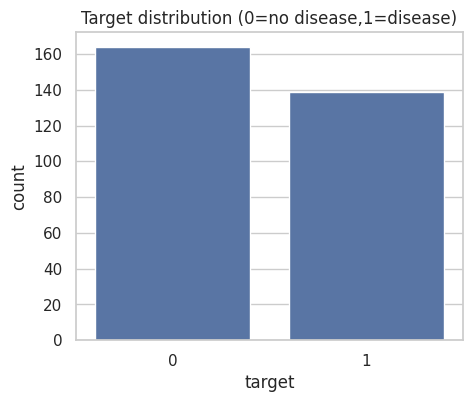

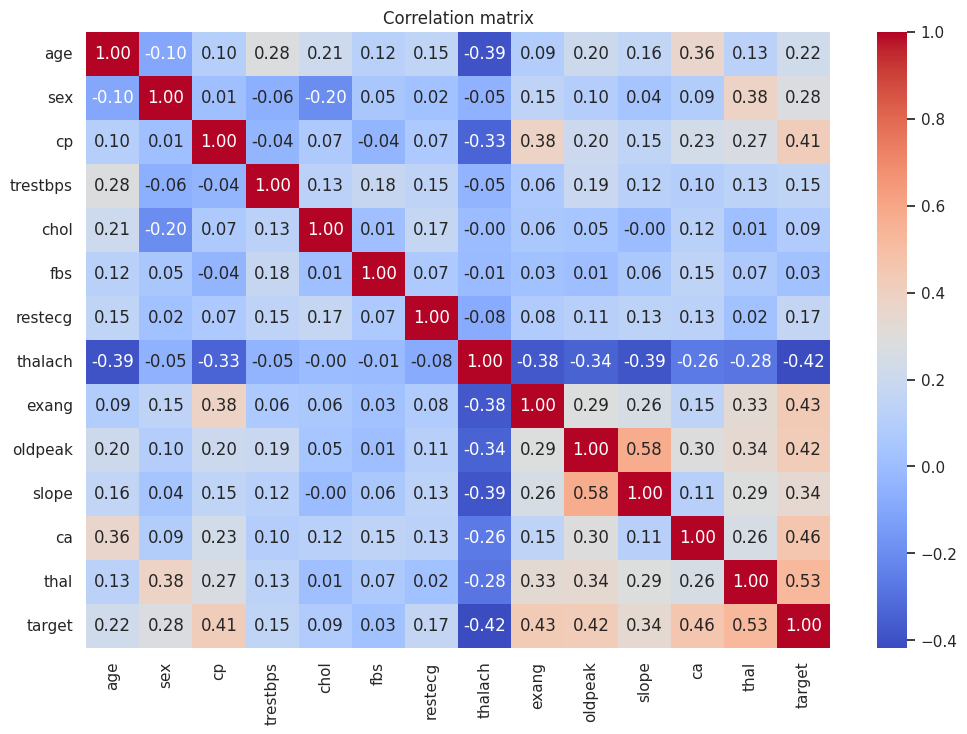

Train/Test shapes: (242, 13) (61, 13)
Logistic Regression performance on test set:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

ROC-AUC: 0.9664502164502166


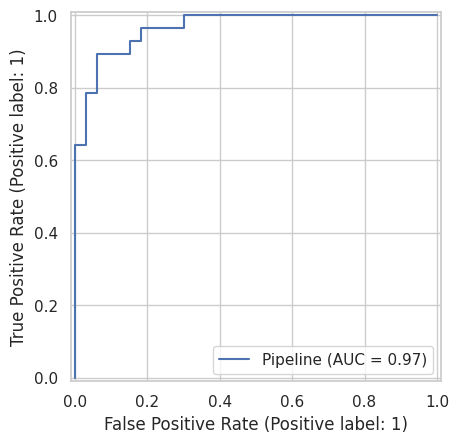

Random Forest performance on test set:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

ROC-AUC: 0.9426406926406926


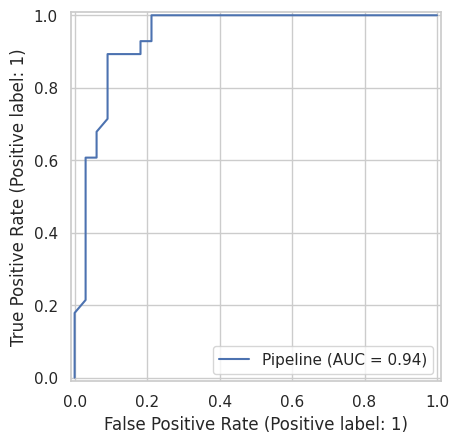

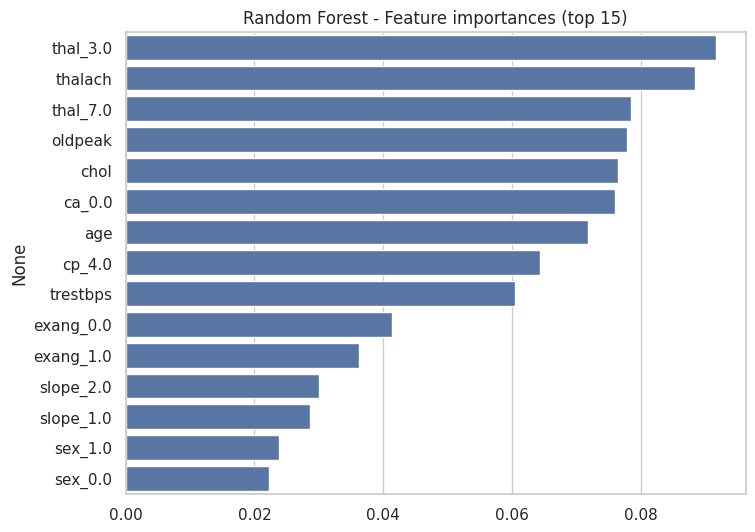

XGBoost performance on test set:
              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61

ROC-AUC: 0.933982683982684


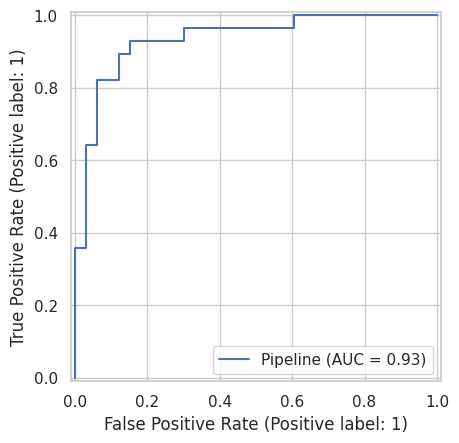

Cross-val AUC (Logistic): 0.9187960958794292
Cross-val AUC (RF): 0.913976571268238
Cross-val AUC (XGB): 0.8881175344717012
Best RF params: {'clf__n_estimators': 100, 'clf__min_samples_split': 4, 'clf__max_depth': None}
Best RF CV AUC: 0.9072936725110639
Best RF test ROC-AUC: 0.9415584415584415


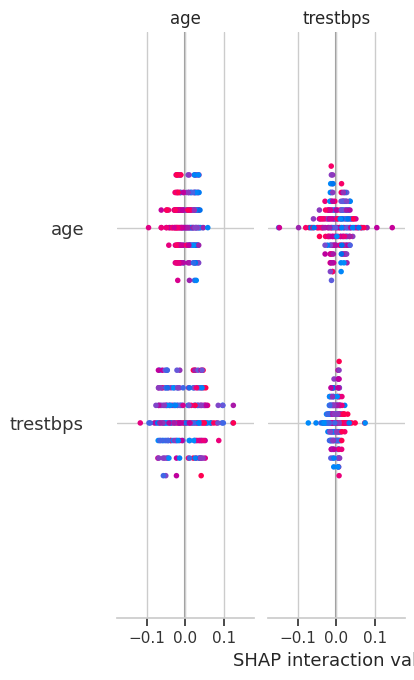

Saved best model pipeline to best_rf_pipeline.joblib
Saved feature names to feature_names.csv
Pipeline complete. Inspect the saved model and plots.


In [3]:
# ---------- Heart Disease Prediction: Full Pipeline ----------
# Save as heart_disease_project.py or run in Google Colab notebook cells.
# Required packages: pandas, numpy, scikit-learn, xgboost, matplotlib, seaborn, shap, joblib
# Install missing packages in Colab:
#   !pip install xgboost shap joblib

import os
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

# ---------- 1. Download dataset ----------
# UCI raw processed Cleveland data (no header)
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
DATA_FILE = "processed.cleveland.data"

if not os.path.exists(DATA_FILE):
    print("Downloading dataset from UCI...")
    urllib.request.urlretrieve(DATA_URL, DATA_FILE)
    print("Downloaded to", DATA_FILE)
else:
    print("Dataset file already present:", DATA_FILE)

# ---------- 2. Load and label columns ----------
# Attribute info (14 attributes used commonly)
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(DATA_FILE, header=None, names=columns, na_values='?')
print("Data shape:", df.shape)
display(df.head())

# ---------- 3. Quick EDA ----------
print("Missing values per column:")
print(df.isna().sum())

print("\nTarget value counts (0 = no disease, 1-4 = disease):")
print(df['target'].value_counts())

# Convert target to binary: 0 means no disease, 1 means presence (1-4)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Basic stats
display(df.describe())

# Visualize class balance
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df)
plt.title('Target distribution (0=no disease,1=disease)')
plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# ---------- 4. Preprocessing ----------
# Identify numeric and categorical features
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
# Some features are ordinal/categorical but stored as numeric:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Simple pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical, impute missing with most frequent, then leave as numeric (one-hot or ordinal)
# Here: we'll do one-hot encoding for categorical with low cardinality
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore')) # Removed sparse=False
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # drop any other columns
)

# Prepare X, y
X = df.drop(columns=['target'])
y = df['target']

# Split data (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

print("Train/Test shapes:", X_train.shape, X_test.shape)

# ---------- 5. Baseline model: Logistic Regression ----------
pipe_lr = Pipeline(steps=[('pre', preprocessor),
                          ('clf', LogisticRegression(max_iter=1000))])

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
y_proba = pipe_lr.predict_proba(X_test)[:,1]

print("Logistic Regression performance on test set:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Plot ROC
RocCurveDisplay.from_estimator(pipe_lr, X_test, y_test)
plt.show()

# ---------- 6. Random Forest ----------
pipe_rf = Pipeline(steps=[('pre', preprocessor),
                          ('clf', RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
y_proba_rf = pipe_rf.predict_proba(X_test)[:,1]

print("Random Forest performance on test set:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

RocCurveDisplay.from_estimator(pipe_rf, X_test, y_test)
plt.show()

# Feature importance (map back to feature names after one-hot)
# Get feature names
cat_ohe = pipe_rf.named_steps['pre'].named_transformers_['cat'].named_steps['ohe']
ohe_cat_names = list(cat_ohe.get_feature_names_out(categorical_features))
all_feature_names = numeric_features + ohe_cat_names

rf_clf = pipe_rf.named_steps['clf']
importances = rf_clf.feature_importances_
feat_imp = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title("Random Forest - Feature importances (top 15)")
plt.show()

# ---------- 7. XGBoost ----------
# XGBoost requires numeric array input; pipeline will produce transformed features
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
pipe_xgb = Pipeline(steps=[('pre', preprocessor),
                           ('clf', xgb_clf)])
pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)
y_proba_xgb = pipe_xgb.predict_proba(X_test)[:,1]

print("XGBoost performance on test set:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
RocCurveDisplay.from_estimator(pipe_xgb, X_test, y_test)
plt.show()

# ---------- 8. Cross-validation and (optional) randomized hyperparam tuning ----------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("Cross-val AUC (Logistic):", cross_val_score(pipe_lr, X, y, cv=cv, scoring='roc_auc').mean())
print("Cross-val AUC (RF):", cross_val_score(pipe_rf, X, y, cv=cv, scoring='roc_auc').mean())
print("Cross-val AUC (XGB):", cross_val_score(pipe_xgb, X, y, cv=cv, scoring='roc_auc').mean())

# Example randomized search for RandomForest (quick)
param_dist = {
    'clf__n_estimators': [50, 100, 200, 500],
    'clf__max_depth': [None, 3, 5, 7, 10],
    'clf__min_samples_split': [2, 4, 8],
}
rs = RandomizedSearchCV(pipe_rf, param_distributions=param_dist, n_iter=12, cv=cv, scoring='roc_auc', random_state=42, n_jobs=-1)
rs.fit(X_train, y_train)
print("Best RF params:", rs.best_params_)
print("Best RF CV AUC:", rs.best_score_)
best_rf = rs.best_estimator_
# Evaluate best_rf on test set
y_pred_best_rf = best_rf.predict(X_test)
print("Best RF test ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

# ---------- 9. Explainability (SHAP) - optional but recommended ----------
try:
    import shap
    # create explainer on a small set for speed
    pre = best_rf.named_steps['pre']
    # Get transformed train set numeric array
    X_train_trans = pre.transform(X_train)
    explainer = shap.TreeExplainer(best_rf.named_steps['clf'])
    # shap expects 2D array of features used by model
    shap_values = explainer.shap_values(X_train_trans[:200])
    # Build dataframe of feature names
    feature_names = numeric_features + list(pre.named_transformers_['cat'].named_steps['ohe'].get_feature_names_out(categorical_features))
    shap.summary_plot(shap_values, pd.DataFrame(X_train_trans[:200], columns=feature_names))
except Exception as e:
    print("SHAP explainability step skipped (install shap and retry). Error:", e)

# ---------- 10. Save the best model and the preprocessor ----------
joblib.dump(best_rf, "best_rf_pipeline.joblib")
print("Saved best model pipeline to best_rf_pipeline.joblib")

# Save preprocessed feature list for later (for mapping new data)
preprocessor_obj = best_rf.named_steps['pre']
ohe_cat = preprocessor_obj.named_transformers_['cat'].named_steps['ohe']
feature_names = numeric_features + list(ohe_cat.get_feature_names_out(categorical_features))
pd.Series(feature_names).to_csv("feature_names.csv", index=False)
print("Saved feature names to feature_names.csv")

# ---------- End ----------
print("Pipeline complete. Inspect the saved model and plots.")